In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 13
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix  
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

In [2]:
costumer_churn = pd.read_excel('E Commerce Dataset.xlsx', sheet_name = 'E Comm')
costumer_churn.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
costumer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [3]:
num_costumer_churn = ['CashbackAmount', 'DaySinceLastOrder', 'OrderCount', 'CouponUsed', 'OrderAmountHikeFromlastYear', 'Complain',
                     'NumberOfAddress', 'SatisfactionScore', 'NumberOfDeviceRegistered', 'HourSpendOnApp', 'WarehouseToHome', 'CityTier',
                     'Tenure', 'Churn', 'CustomerID']
cat_costumer_churn = ['MaritalStatus', 'PreferedOrderCat', 'Gender', 'PreferredPaymentMode', 'PreferredLoginDevice']

In [4]:
print('PreferredLoginDevice :', (costumer_churn['PreferredLoginDevice'].unique()))
print('PreferredPaymentMode :', (costumer_churn['PreferredPaymentMode'].unique()))
print('Gender :', (costumer_churn['Gender'].unique()))
print('PreferedOrderCat:', (costumer_churn['PreferedOrderCat'].unique()))
print('MaritalStatus:', (costumer_churn['MaritalStatus'].unique()))

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender : ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


In [5]:
costumer_churn['PreferedOrderCat'] = costumer_churn['PreferedOrderCat'].replace({'Mobile' : 'Mobile Phone'})
costumer_churn['PreferredPaymentMode'] = costumer_churn['PreferredPaymentMode'].replace({'CC' : 'Credit Card', 'COD' : 'Cash on Delivery'})
costumer_churn['PreferredLoginDevice'] = costumer_churn['PreferredLoginDevice'].replace({'Phone' : 'Mobile Phone'})

terdapat inconssitent data pada kolum, PreferedOrderCat,  PreferredPaymentMode, PreferredLoginDevice  

In [12]:
costumer_churn.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [6]:
costumer_churn.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

pada kolum Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, 
DaySinceLastOrder terdapat missing value yang kurang dari 10 persen pada data jadi kolum ini akan di imputasi  

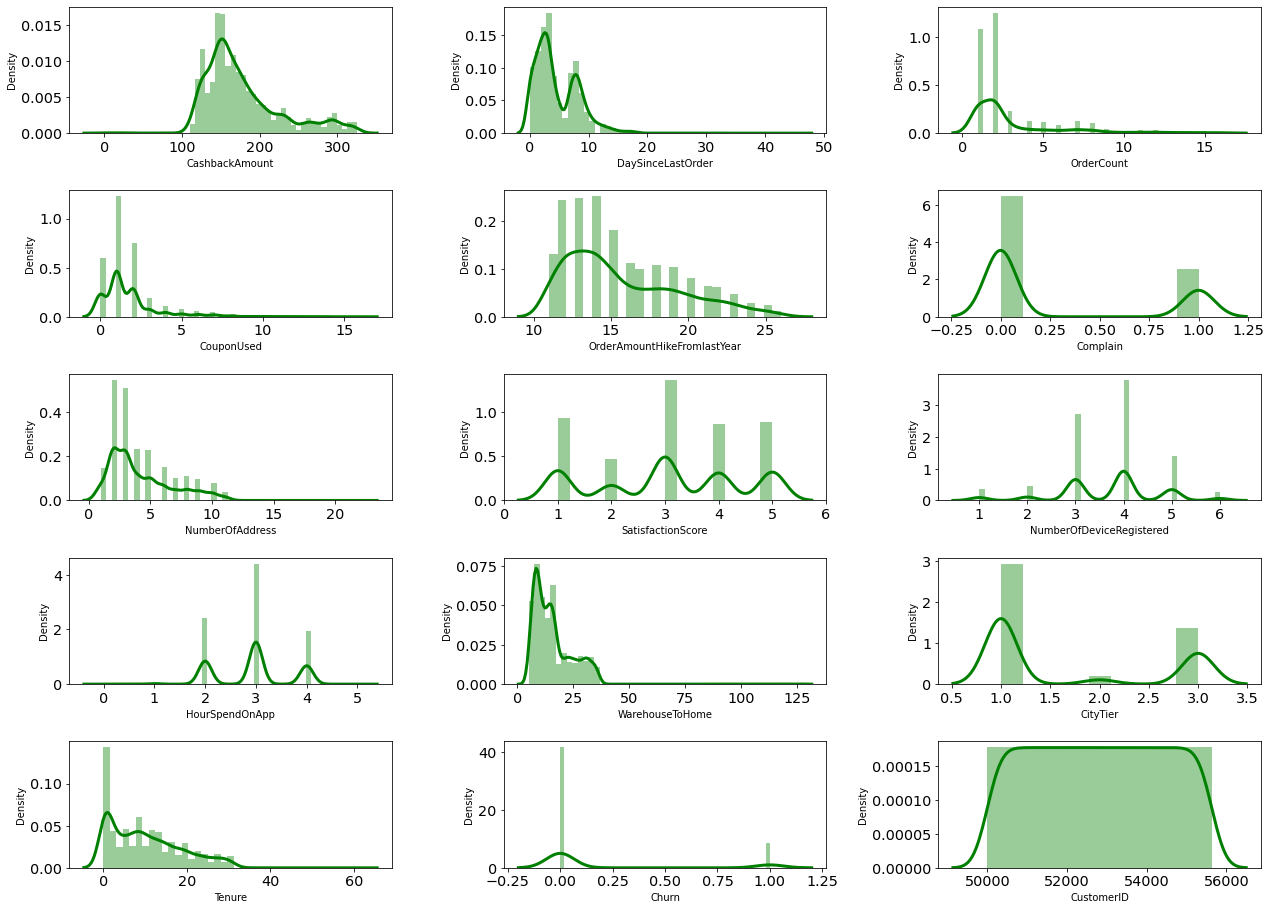

In [10]:
for i in range(0, len(num_costumer_churn)):
    plt.subplot(5, len(num_costumer_churn)/5, i+1)
    sns.distplot(costumer_churn[num_costumer_churn[i]], color='green')
    plt.tight_layout(pad=2)

1. terdapat data berdistribusi skewned kanan pada kolum CashbackAmount, DaySinceLastOrder, OrderCount, CouponUsed, OrderAmountHikeFromlastYear, NumberOfAddress, WarehouseToHome, Tenure
2. sedangkan pada kolum Complain, SatisfactionScore, NumberOfDeviceRegistered, HourSpendOnApp, CityTier, dan Churn data berdistribusi tidak normal

In [7]:
costumer_churn['Tenure'].fillna(costumer_churn['Tenure'].median(),inplace=True)
costumer_churn['WarehouseToHome'].fillna(costumer_churn['WarehouseToHome'].median(),inplace=True)
costumer_churn['HourSpendOnApp'].fillna(costumer_churn['HourSpendOnApp'].median(),inplace=True)
costumer_churn['OrderAmountHikeFromlastYear'].fillna(costumer_churn['OrderAmountHikeFromlastYear'].median(),inplace=True)
costumer_churn['CouponUsed'].fillna(costumer_churn['CouponUsed'].median(),inplace=True)
costumer_churn['OrderCount'].fillna(costumer_churn['OrderCount'].median(),inplace=True)
costumer_churn['DaySinceLastOrder'].fillna(costumer_churn['DaySinceLastOrder'].median(),inplace=True)

kolum yang missing value diimputasi dengan median karena data berdistribusi skewned kanan (Tenure, WarehouseToHome, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder), sedangkan pada kolum HourSpendOnApp data berdistriibusi normal taapi tetap di input dengan median karena kalau di  input mean akan menghasilkan float selain itu mean tidak robust paada outlier

In [8]:
costumer_churn.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [9]:
costumer_churn.duplicated().sum()

0

tidak terdapat data duplikat

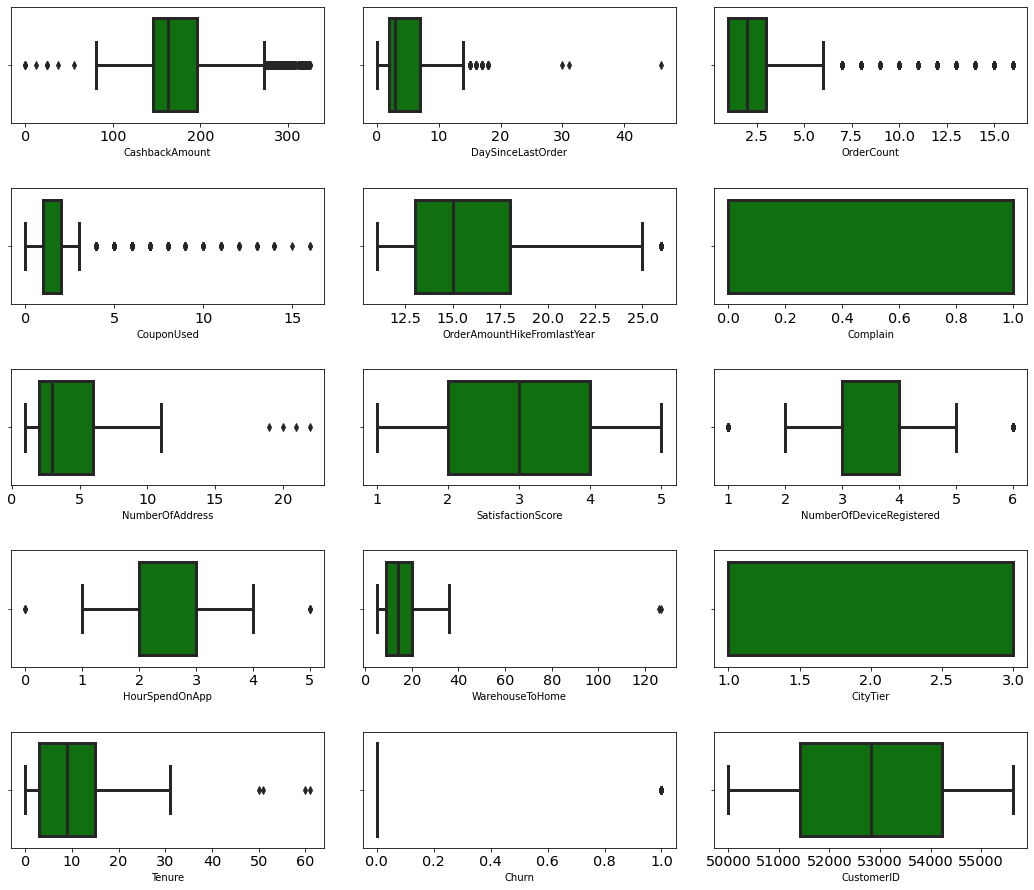

In [18]:
for i in range(0, len(num_costumer_churn)):
    plt.subplot(5, len(num_costumer_churn)/5, i+1)
    sns.boxplot(costumer_churn[num_costumer_churn[i]], color='green', orient='v')
    plt.tight_layout(pad=3)

terdapat outliar pada kolum CashbackAmount, DaySinceLastOrder, OrderCount, CouponUsed, OrderAmountHikeFromlastYear, NumberOfAddress, NumberOfDeviceRegistered, HourSpendOnApp, WarehouseToHome, Tenure

In [10]:
from scipy import stats
print(f'jumlah baris sebelum difilter:{len(costumer_churn)}')

filtered_entries = np.array([True]*len(costumer_churn))
for col in ['CashbackAmount', 'DaySinceLastOrder', 'OrderCount', 'CouponUsed', 'OrderAmountHikeFromlastYear', 'NumberOfAddress', 
            'NumberOfDeviceRegistered', 'HourSpendOnApp', 'WarehouseToHome', 'Tenure']:
    zscore=abs(stats.zscore(costumer_churn[col]))
    filtered_entries = (zscore<3) & filtered_entries
data2 = costumer_churn[filtered_entries]
print(f'jumlah baris setelah difilter:{len(data2)}')

jumlah baris sebelum difilter:5630
jumlah baris setelah difilter:5350


In [11]:
data2.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [11]:
le = LabelEncoder()
data2['PreferredPaymentMode']=le.fit_transform(data2['PreferredPaymentMode'])
data2['PreferedOrderCat']=le.fit_transform(data2['PreferedOrderCat'])
data2['MaritalStatus']=le.fit_transform(data2['MaritalStatus'])
data2['PreferredLoginDevice']=le.fit_transform(data2['PreferredLoginDevice'])
data2['Gender']=le.fit_transform(data2['Gender'])
data2.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,9.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,9.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,1,1,12.0,1,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


pada kolum kategorik dilakukann untuk feture encoding menggunakan label encoding 

In [12]:
data2 = data2.drop(['CustomerID'], 1)
data2.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,1,1,12.0,1,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


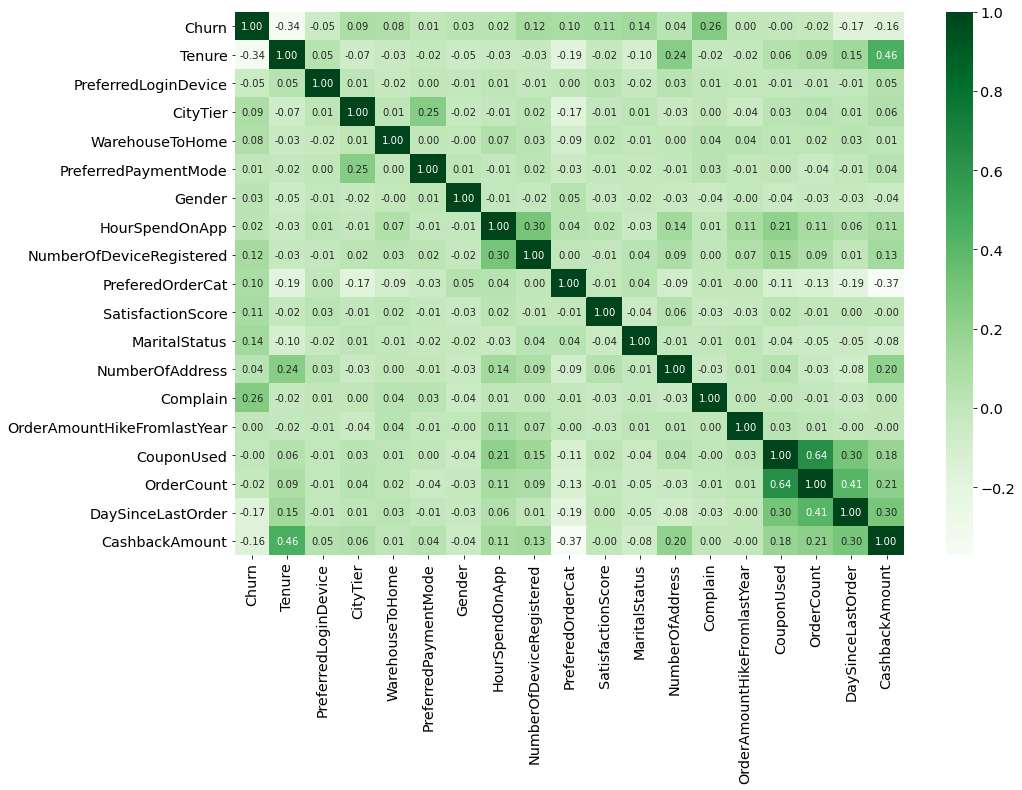

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(), annot=True, cmap = 'Greens', fmt='.2f')
plt.show()

In [13]:
num1_costumer_churn = ['CashbackAmount', 'DaySinceLastOrder', 'OrderCount', 'CouponUsed', 'OrderAmountHikeFromlastYear', 'Complain',
                     'NumberOfAddress', 'SatisfactionScore', 'NumberOfDeviceRegistered', 'HourSpendOnApp', 'WarehouseToHome', 'CityTier',
                     'Tenure', 'Churn']
cat1_costumer_churn = ['MaritalStatus', 'PreferedOrderCat', 'Gender', 'PreferredPaymentMode', 'PreferredLoginDevice']

In [32]:
costumer_churn[cat1_costumer_churn].describe()

,MaritalStatus,PreferedOrderCat,Gender,PreferredPaymentMode,PreferredLoginDevice
count,5630,5630,5630,5630,5630
unique,3,5,2,5,2
top,Married,Mobile Phone,Male,Debit Card,Mobile Phone
freq,2986,2080,3384,2314,3996


In [33]:
costumer_churn[num1_costumer_churn].describe()

,CashbackAmount,DaySinceLastOrder,OrderCount,CouponUsed,OrderAmountHikeFromlastYear,Complain,NumberOfAddress,SatisfactionScore,NumberOfDeviceRegistered,HourSpendOnApp,WarehouseToHome,CityTier,Tenure,Churn
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,177.223030,4.459325,2.961812,1.716874,15.674600,0.284902,4.214032,3.066785,3.688988,2.934636,15.566785,1.654707,10.134103,0.168384
std,49.207036,3.570626,2.879248,1.857640,3.591058,0.451408,2.583586,1.380194,1.023999,0.705528,8.345961,0.915389,8.357951,0.374240
min,0.000000,0.000000,1.000000,0.000000,11.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000
25%,145.770000,2.000000,1.000000,1.000000,13.000000,0.000000,2.000000,2.000000,3.000000,2.000000,9.000000,1.000000,3.000000,0.000000
50%,163.280000,3.000000,2.000000,1.000000,15.000000,0.000000,3.000000,3.000000,4.000000,3.000000,14.000000,1.000000,9.000000,0.000000
75%,196.392500,7.000000,3.000000,2.000000,18.000000,1.000000,6.000000,4.000000,4.000000,3.000000,20.000000,3.000000,15.000000,0.000000
max,324.990000,46.000000,16.000000,16.000000,26.000000,1.000000,22.000000,5.000000,6.000000,5.000000,127.000000,3.000000,61.000000,1.000000


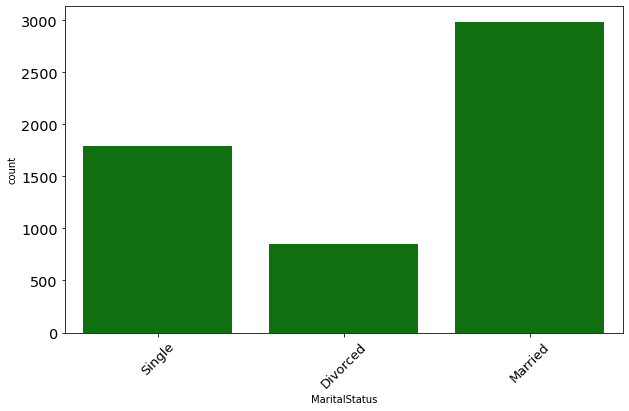

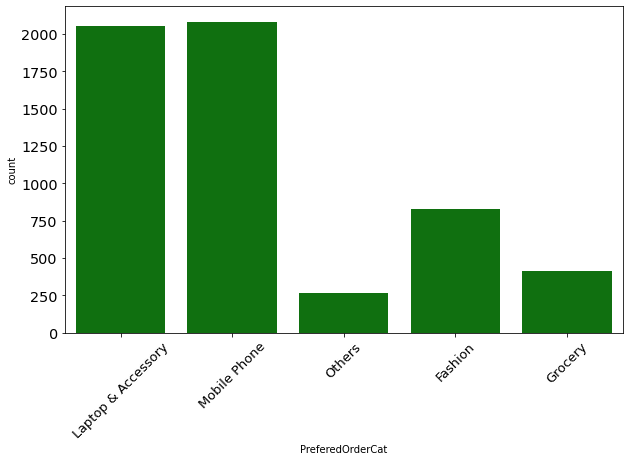

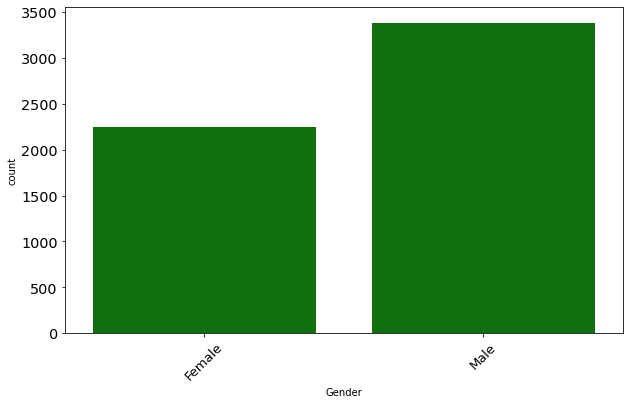

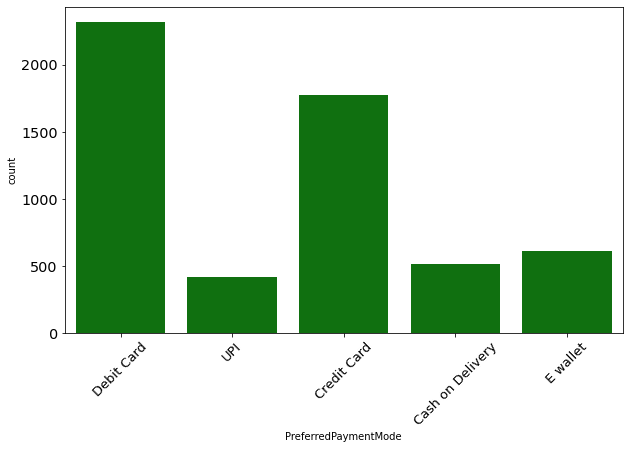

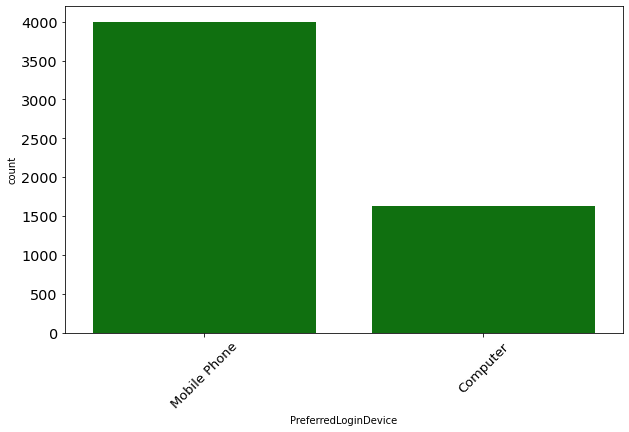

In [37]:
for i in range(0, len(cat1_costumer_churn)):
    plt.figure()
    sns.countplot(costumer_churn[cat1_costumer_churn[i]], color='green')
    plt.xticks(rotation=45, fontsize=13)

1. gender yang paling banyak adalah male(pria) yaitu sebanyak 3384
2. pelanggan kebanyakan sudah menikah
3. kebanyakan pelanggan Perangkat login pilihan adalah Mobile Phone
4. mayoritas metode pembayaran menggunakan Debit Card

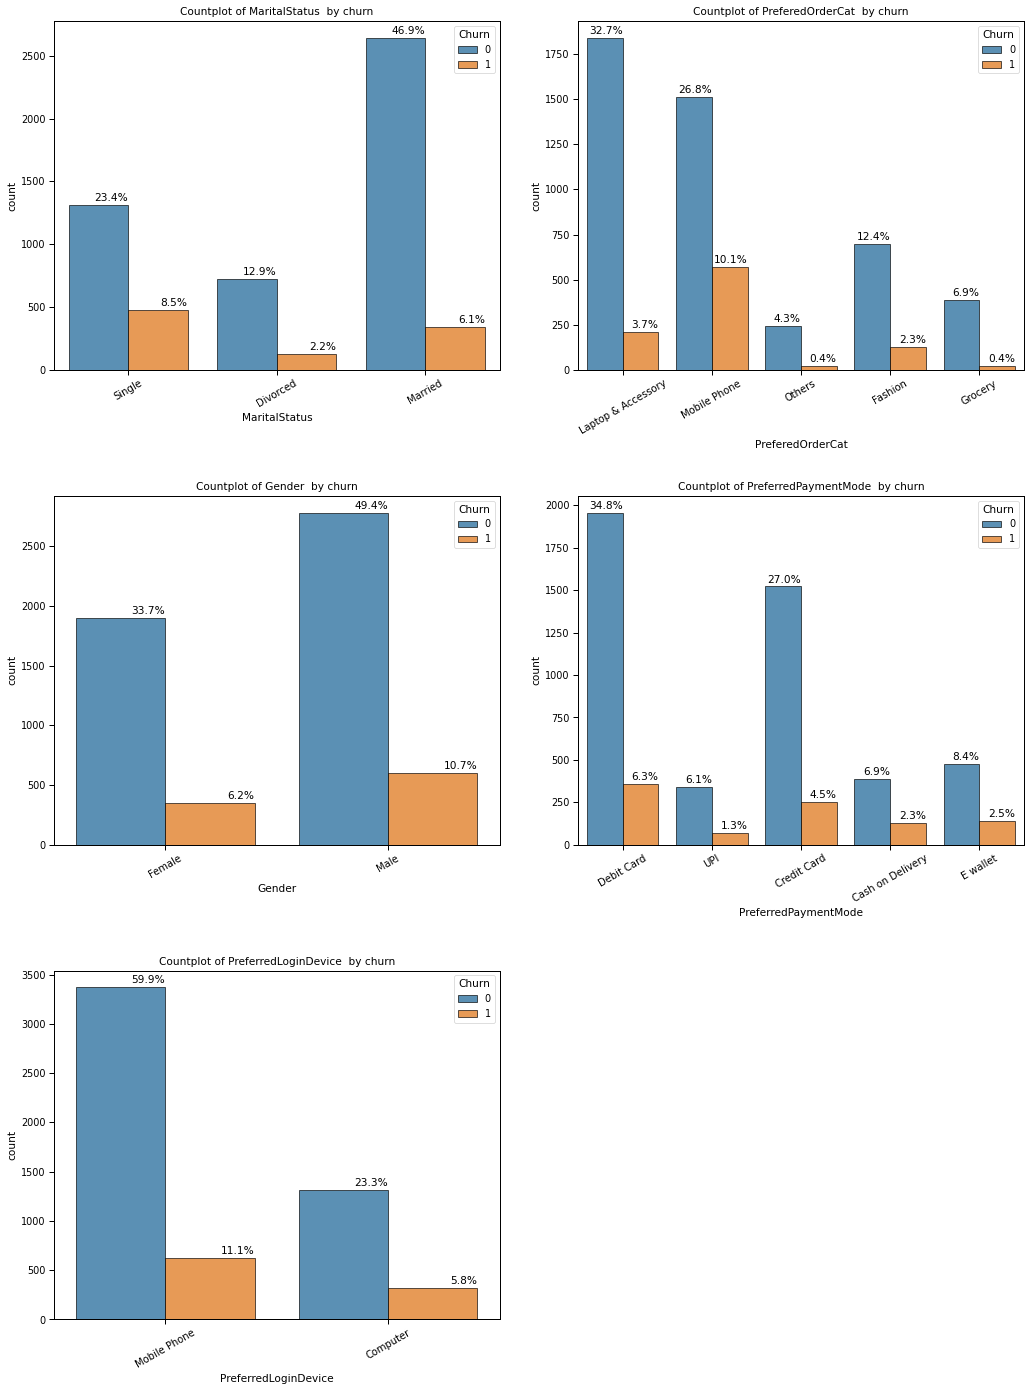

In [68]:
n = 1
plt.figure(figsize=[15, 20])
for f in cat1_costumer_churn:
    plt.subplot(3, 2, n)
    ax = sns.countplot(x=f, hue='Churn', edgecolor='black', alpha=0.8, data=costumer_churn)
    plt.title("Countplot of {}  by churn".format(f))
    n=n+1
    plt.xticks(rotation=30, fontsize=10)
    plt.tight_layout(pad=3)
    total = float(len(costumer_churn))
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='right', va='center', xytext=(0, 7), textcoords='offset points')
        plt.savefig('foo.png')          

1. berdasarkan tabel marital status customer, status single memiliki persentase churn rate yang tinggi yaitu sekitar 8.5% dari total 1796 customer yang tercatat dengan status
   single.
2. costumer yang memesan meenggunakan mobile phone memiliki persentase churn rate yang tinggi yaitu sekitar 10.1% dari total 2080 customer yang tercatat memesan meenggunakan mobile phone
3. Dari total customer yang tercatat, customer laki-laki mendominasi dengan jumlah 3384 sedangkan customer perempuan berjumlah 2246 dengan persentase churn rate untuk customer 
   laki-laki yaitu sekitar 10.7% dan customer perempuan yaitu sekitar 6.2% 
4. pelanggan yang menggunakan metode pembayaran dengan debit card cenderung memiliki persentase churn rate yang tinggi yaitu sekitar 6.3% 


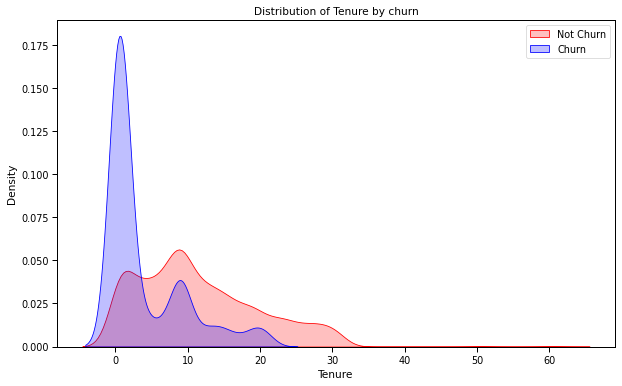

In [20]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(costumer_churn.Tenure[(costumer_churn["Churn"] == 0) ],
            color="Red", shade = True)
ax = sns.kdeplot(costumer_churn.Tenure[(costumer_churn["Churn"] == 1) ],
            ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Tenure')
ax.set_title('Distribution of Tenure by churn')

presentase Churn rate tertinggi terjadi Ketika customer berada pada rentang tenure 0-1 bulan, ketikan tenure meningkat presentase churn rate akan menurun.
dapat disimpulkan bahwa new costumer tidak menikmati ketika berbelanja di aplikasinya kita, jika bisa memaintain mereka dalam 2 bulan mereka akaan cenderung loyal karena tingkat churn menurun secara signifikan 

In [21]:
costumer_churn.groupby(['Tenure', 'Churn'])['Churn'].agg(['sum'])

sum
Tenure Churn     
0.0    0        0
       1      272
1.0    0        0
       1      349
2.0    0        0
       1       14
3.0    0        0
       1       18
4.0    0        0
       1       20
5.0    0        0
       1       16
6.0    0        0
       1        8
7.0    0        0
       1       16
8.0    0        0
       1       16
9.0    0        0
       1       93
10.0   0        0
       1       14
11.0   0        0
       1       10
12.0   0        0
       1        7
13.0   0        0
       1       13
14.0   0        0
       1       14
15.0   0        0
       1       10
16.0   0        0
       1       10
17.0   0        0
       1        4
18.0   0        0
       1        6
19.0   0        0
       1       12
20.0   0        0
       1       16
21.0   0        0
       1       10
22.0   0        0
23.0   0        0
24.0   0        0
25.0   0        0
26.0   0        0
27.0   0        0
28.0   0        0
29.0   0        0
30.0   0        0
31.0   0        0
50.0   0        0
51.0   0        0
60.0   0        0
61.0   0        0

In [36]:
churn_vs_CashbackAmount = costumer_churn.groupby(['Churn'])['CashbackAmount'].mean().reset_index(name='CashbackAmount')
churn_vs_CashbackAmount

,Churn,CashbackAmount
0,0,180.635203
1,1,160.370928


(0.0, 210.0)

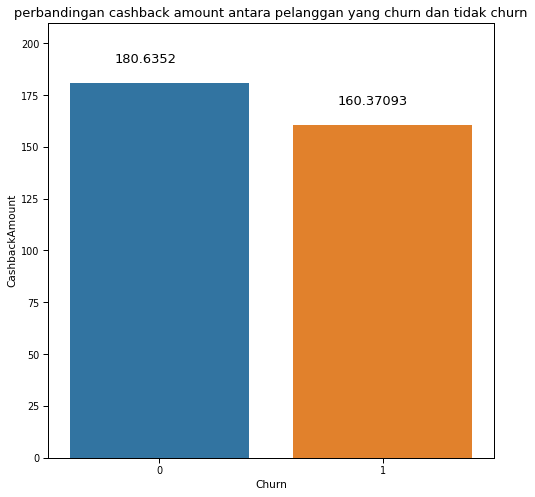

In [61]:
x = churn_vs_CashbackAmount['Churn']
y = churn_vs_CashbackAmount['CashbackAmount']
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=x, y=y, data=churn_vs_CashbackAmount)
plt.title('perbandingan cashback amount antara pelanggan yang churn dan tidak churn', fontsize=13)
plt.xlabel('Churn')
plt.ylabel('CashbackAmount')
num = range(len(x))
for i in num:
    plt.text(x = num[i]-0.2, y = y[i]+10, s = round(y[i], 5), size = 13)
plt.ylim(0,  210)

terdapat perbedaan cashback amount, antara costumer yang churn dan non-churn, terlihat bahwa costumer yang churn memiliki jumlah cashback yang lebih kecil yaitu sekitar 180.63 dolar dibandingkan jumlah cashback yang non-churn sekitar 160.37 dolar  

In [67]:
costumer_churn.groupby(['Complain', 'Churn'])['Churn'].agg(['sum', 'mean'])

sum  mean
Complain Churn           
0        0        0     0
         1      440     1
1        0        0     0
         1      508     1

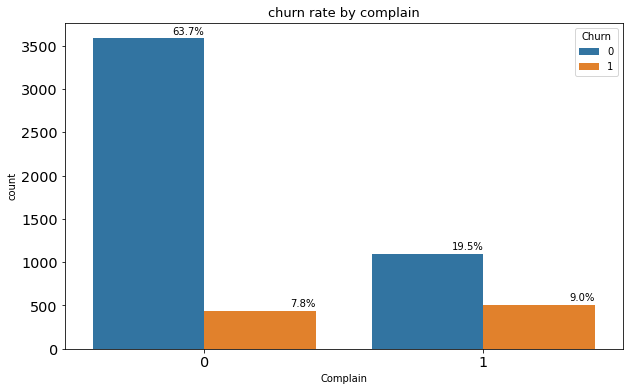

In [10]:
plt.figure(figsize=[10, 6])
ax = sns.countplot(data=costumer_churn, x='Complain', hue='Churn')
plt.title('churn rate by complain', fontsize=13)
total = float(len(costumer_churn))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='center', xytext=(0, 7), textcoords='offset points')

customer yang memiliki keluhan pada saat melakukan transaksi memiliki persentasi churn yang tinggi sebesar 9%. sedangkan Dari customer yang
tidak memiliki keluhan ternyata memiliki persentasi mengalami churn yaitu sebesar 7.8%

In [77]:
costumer_churn.groupby(['SatisfactionScore', 'Churn'])['Churn'].agg(['sum', 'mean'])

sum  mean
SatisfactionScore Churn           
1                 0        0     0
                  1      134     1
2                 0        0     0
                  1       74     1
3                 0        0     0
                  1      292     1
4                 0        0     0
                  1      184     1
5                 0        0     0
                  1      264     1

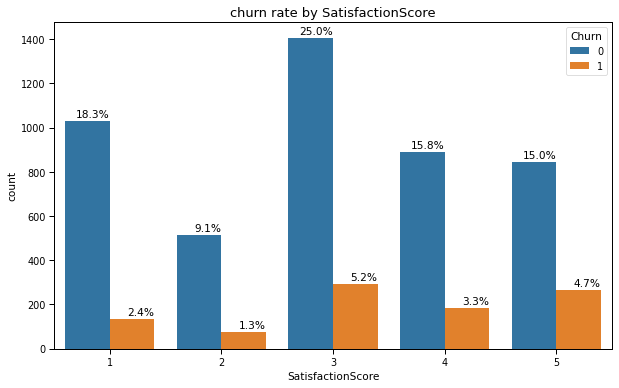

In [78]:
plt.figure(figsize=[10, 6])
ax = sns.countplot(data=costumer_churn, x='SatisfactionScore', hue='Churn')
plt.title('churn rate by SatisfactionScore', fontsize=13)
total = float(len(costumer_churn))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', va='center', xytext=(0, 7), textcoords='offset points')

Text(0, 0.5, 'WarehouseToHome')

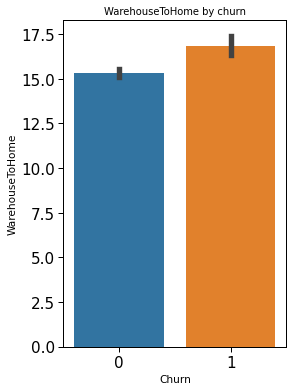

In [45]:
x = costumer_churn['Churn']
y = costumer_churn['WarehouseToHome']
plt.figure(figsize=(4, 6))
ax = sns.barplot(x=x, y=y, data=costumer_churn)
plt.title('WarehouseToHome by churn', fontsize=10)
plt.xlabel('Churn')
plt.ylabel('WarehouseToHome')


customer yang Churn meningkat Ketika jarak rumah dengan warehouse semakin jauh

Text(0.5, 1.0, 'PROPOSION CHURN(%)')

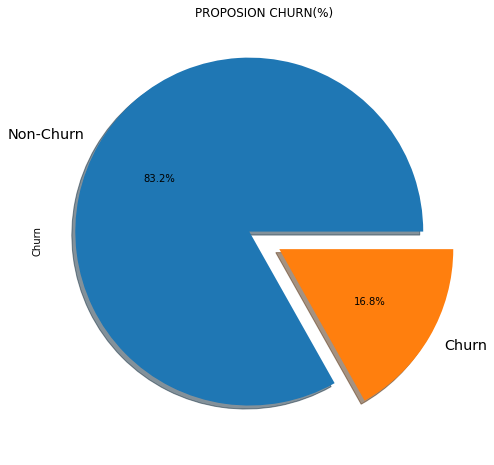

In [11]:
labels = 'Non-Churn', 'Churn'
costumer_churn['Churn'].value_counts().plot.pie(explode=[0.1,0.1], labels=labels, autopct='%1.1f%%', shadow=True, figsize=(8,8));
plt.title("PROPOSION CHURN(%)")

dari total 5630 customer yang tercatat, Sekitar 83.2% atau sekitar 4682 customer memilih untuk stay dan Sekitar 16.8% atau sekitar 948 customer memilih untuk churn.

In [14]:
data2['churn_class'] = data2['Churn'] > 0.8
data2['churn_class'].value_counts()

False    4438
True      912
Name: churn_class, dtype: int64

In [15]:
X = data2[[col for col in data2.columns if (str(data2[col].dtype) != 'object') and col not in ['Churn', 'churn_class']]]
y = data2['churn_class'].values
print(X.shape)
print(y.shape)

(5350, 18)
(5350,)


In [16]:
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling
X_under, y_under = under_sampling.RandomUnderSampler().fit_resample(X, y)
pd.Series(y_under).value_counts()

False    912
True     912
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,-0.827843,-1.563100,-0.715688,-1.056959,0.239078,0.821274,1.521836,2.242722,0.809667,-0.754512,-0.251152,-0.475503,-0.637216,0.938686,1.066005,0.217261,1.445206,-0.478032
1,-1.195723,0.639754,1.472273,2.297858,1.224870,0.821274,0.093133,-0.661913,-0.125404,0.696864,-0.251152,-0.866729,-0.637216,1.219047,-1.090526,-0.747342,-0.075390,-0.251372
2,-1.195723,-1.563100,1.472273,-0.808454,-0.746715,-1.217620,0.093133,-1.630125,-0.125404,-0.754512,-0.251152,-0.866729,1.569326,1.219047,-0.371683,-0.747342,-0.075390,-0.601488
3,-0.214711,0.639754,-0.715688,-0.062939,0.239078,-1.217620,0.093133,0.306299,-0.125404,1.422553,-0.251152,0.306947,-0.637216,-0.182759,0.347161,-0.265041,-0.987748,0.039278
4,0.275795,0.639754,1.472273,-1.056959,0.239078,-1.217620,0.093133,1.274510,-0.125404,-1.480201,1.245967,0.698173,-0.637216,2.060130,-0.371683,-0.265041,-0.379510,0.807379


In [20]:
def eval_classification(model, pred, X_train, y_train, X_test, y_test):
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, pred)) 
    fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1) 
    print("AUC: %.2f" % auc(fpr, tpr))
    
def cros_validation(model):    
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1).mean()
    print('Recall cross_val:', scores)    
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])    

In [21]:
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
cros_validation(knn_model)
eval_classification(knn_model, predicted_y, X_train, y_train, X_test, y_test)

Recall cross_val: 0.46157529753042414
Accuracy (Test Set): 0.90
Precision (Test Set): 0.84
Recall (Test Set): 0.59
F1-Score (Test Set): 0.69
AUC: 0.78


In [22]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
cros_validation(svc_model)
eval_classification(svc_model, y_pred, X_train, y_train, X_test, y_test)

Recall cross_val: 0.0
Accuracy (Test Set): 0.90
Precision (Test Set): 0.91
Recall (Test Set): 0.49
F1-Score (Test Set): 0.63
AUC: 0.74


In [23]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
cros_validation(rf)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Recall cross_val: 0.9173990021025388
Accuracy (Test Set): 0.96
Precision (Test Set): 0.95
Recall (Test Set): 0.80
F1-Score (Test Set): 0.87
AUC: 0.90


In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop =900, num =10)],
                       bootstrap = [True], 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 2)], 
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 2)],
                       max_features = ['auto', 'sqrt', 'log2'], 
                       n_jobs = [-1], 
                      )
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.96
Precision (Test Set): 0.96
Recall (Test Set): 0.82
F1-Score (Test Set): 0.89
AUC: 0.91


In [25]:
cros_validation(rf)

Recall cross_val: 0.9173990021025388


In [26]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 277
Best bootstrap: True
Best criterion: entropy
Best max_depth: 20
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: sqrt
Best n_jobs: -1


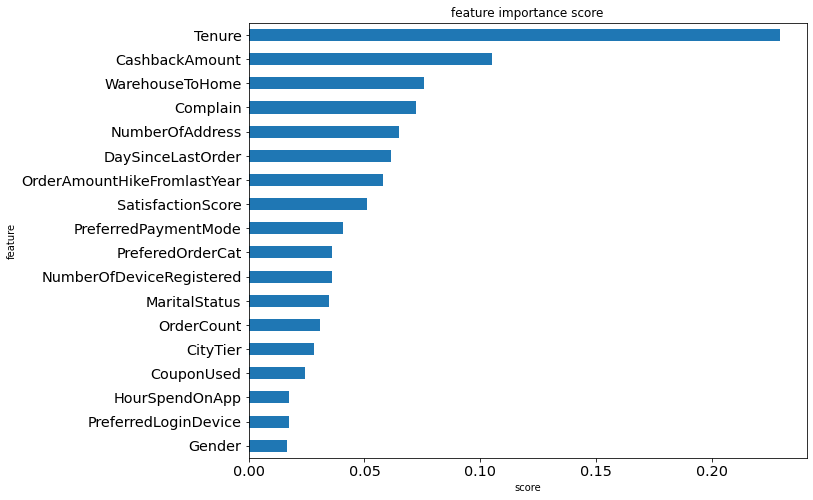

In [27]:
show_feature_importance(rf_tuned.best_estimator_)

In [28]:
ab = AdaBoostClassifier()
ab.fit(X_train,y_train)
y_pred = ab.predict(X_test)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
cros_validation(ab)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Recall cross_val: 0.578991915544015
Accuracy (Test Set): 0.88
Precision (Test Set): 0.76
Recall (Test Set): 0.52
F1-Score (Test Set): 0.62
AUC: 0.74


In [29]:
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 900, num = 10)], 
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R'])
                      
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)
y_pred = ab_tuned.predict(X_test)
cros_validation(ab)
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

Recall cross_val: 0.578991915544015
Accuracy (Test Set): 0.82
Precision (Test Set): 0.51
Recall (Test Set): 0.61
F1-Score (Test Set): 0.56
AUC: 0.74


In [30]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 100
Best learning_rate: 0.006210526315789474
Best algorithm: SAMME.R


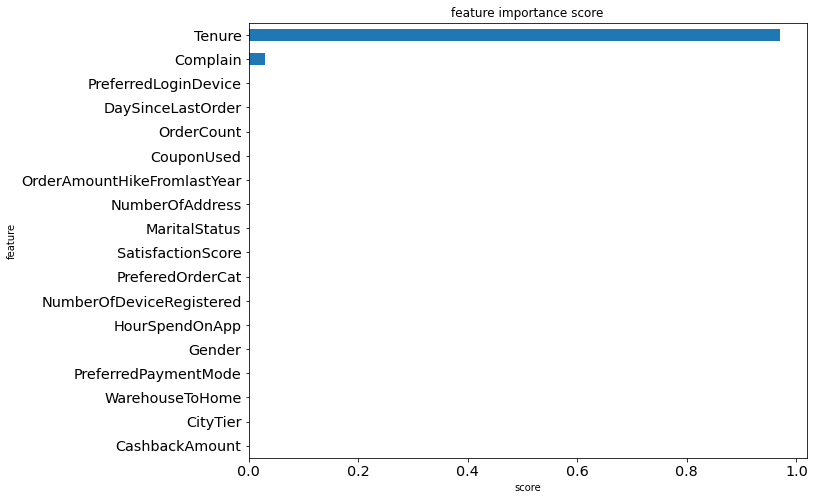

In [31]:
show_feature_importance(ab_tuned.best_estimator_)

In [32]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)
cros_validation(xg)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

[21:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Recall cross_val: 0.9501636581772294
Accuracy (Test Set): 0.97
Precision (Test Set): 0.96
Recall (Test Set): 0.87
F1-Score (Test Set): 0.91
AUC: 0.93


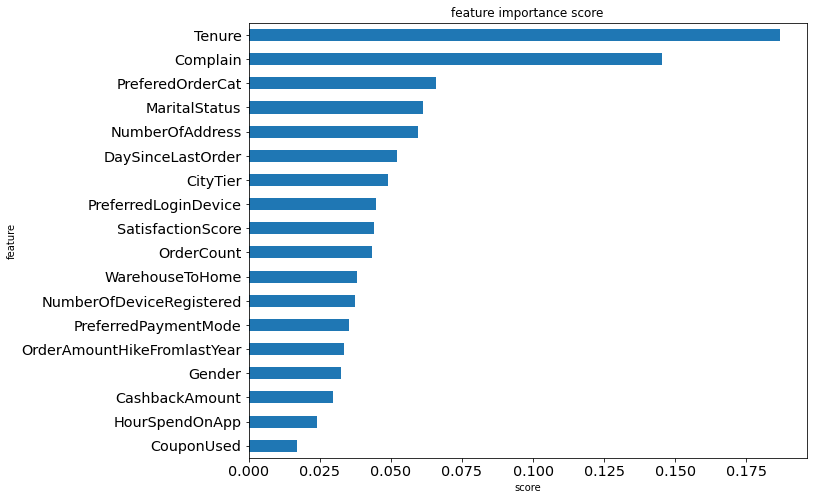

In [33]:
show_feature_importance(xg)

In [34]:
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 150, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)
y_pred = xg_tuned.predict(X_test)
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

[21:17:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [35]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 150
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


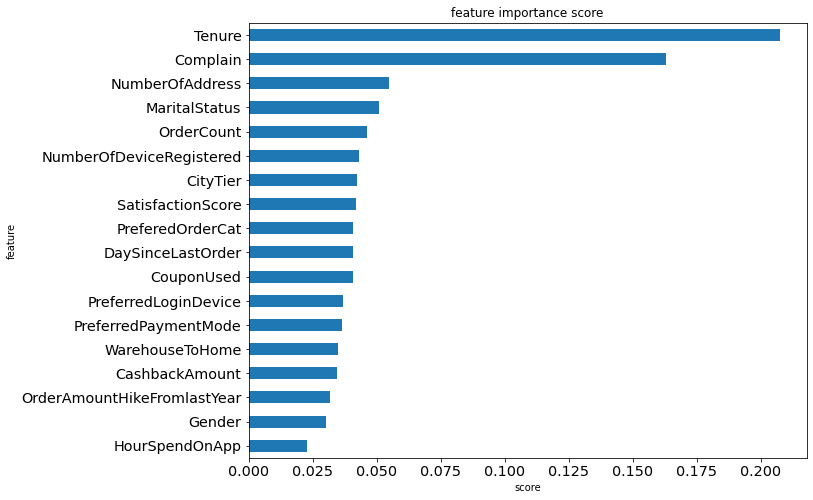

In [36]:
show_feature_importance(xg_tuned.best_estimator_)

In [37]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
cros_validation(gb)
eval_classification(gb, gb_pred, X_train, y_train, X_test, y_test)

Recall cross_val: 0.6344316733328969
Accuracy (Test Set): 0.89
Precision (Test Set): 0.79
Recall (Test Set): 0.54
F1-Score (Test Set): 0.64
AUC: 0.76


In [39]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_over, y_over)
lr_pred = model_lr.predict(X_test)
cros_validation(model_lr)
eval_classification(model_lr,lr_pred,X_over, y_over, X_test, y_test)

Recall cross_val: 0.45277948031784543
Accuracy (Test Set): 0.67
Precision (Test Set): 0.31
Recall (Test Set): 0.65
F1-Score (Test Set): 0.42
AUC: 0.66


In [40]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
cros_validation(dt_model)
eval_classification(dt_model,predictdt_y,X_over, y_over, X_test, y_test)

Recall cross_val: 0.925262827870583
Accuracy (Test Set): 0.95
Precision (Test Set): 0.85
Recall (Test Set): 0.86
F1-Score (Test Set): 0.85
AUC: 0.91


In [15]:
data_list1 = [{'Method' : 'XGBClassifier', 'Recall' : 0.89, 'Recall cross_val' : 0.95},
             {'Method' : 'DecisionTreeClassifier', 'Recall' : 0.86, 'Recall cross_val' : 0.92},
             {'Method' : 'RandomForestClassifier', 'Recall' : 0.82, 'Recall cross_val' : 0.91},
             {'Method' : 'LogisticRegression', 'Recall' : 0.65, 'Recall cross_val' : 0.45},
             {'Method' : 'AdaBoostClassifier', 'Recall' : 0.61, 'Recall cross_val' : 0.57},
             {'Method' : 'KNeighborsClassifier', 'Recall' : 0.59, 'Recall cross_val' : 0.46},
             {'Method' : 'GradientBoostingClassifier', 'Recall' : 0.54, 'Recall cross_val' : 0.63},
             {'Method' : 'SVC', 'Recall' : 0.49, 'Recall cross_val' : 0.0}]
df = pd.DataFrame(data_list1)
df

,Method,Recall,Recall cross_val
0,XGBClassifier,0.89,0.95
1,DecisionTreeClassifier,0.86,0.92
2,RandomForestClassifier,0.82,0.91
3,LogisticRegression,0.65,0.45
4,AdaBoostClassifier,0.61,0.57
5,KNeighborsClassifier,0.59,0.46
6,GradientBoostingClassifier,0.54,0.63
7,SVC,0.49,0.00


1. Model machine learning yang dibuat dengan membandingkan beberapa model machine
learning yaitu SVC, GradientBoostingClassifier, KNeighborsClassifier, AdaBoostClassifier, LogisticRegression, RandomForestClassifier,
DecisionTreeClassifie, XGBClassifier.
2. Metode evaluasi machine learning menggunakan metode yaitu cross validation 
3. Metrik evaluasi yang digunakan adalah recall.
4. Dari hasil perbandingan menggunakan cross validation, di dapatkan model terbaik, yaitu XGBClassifier.